# The Greeks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

For a binary European put option which pays \$1 if $S_T < K$ and nothing else draw on three separate figures

In [2]:
# Parameters

K = 100        # Strike price
T = 1.0        # Time to maturity (in years)
t = 0.5        # Current time (i.e., t < T)
r = 0.05       # Risk-free rate
sigma = 0.2    # Volatility

# Time to maturity from current time
tau = T - t

a) the pay-off function of the option as a function of $S_T$

In [3]:
def binary_payoff(option_type):

    S_T = np.linspace(0, 200, 1000)  # Stock price range at maturity

    if option_type == 'Call':
        payoff = np.where(S_T > K, 1, 0)
    else:
        payoff = np.where(S_T < K, 1, 0)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(S_T, payoff, 'r-', lw=2, label=f'Binary {option_type} Payoff')
    plt.axvline(x=K, color='k', linestyle='--', alpha=0.5, label='Strike Price (K)')
    plt.xlabel('Stock Price at Maturity ($S_T$)', fontsize=12)
    plt.ylabel('Payoff', fontsize=12)
    plt.title(f'Binary European {option_type} Option Payoff', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.xlim(0, 200)
    plt.ylim(-0.1, 1.4)
    plt.show()

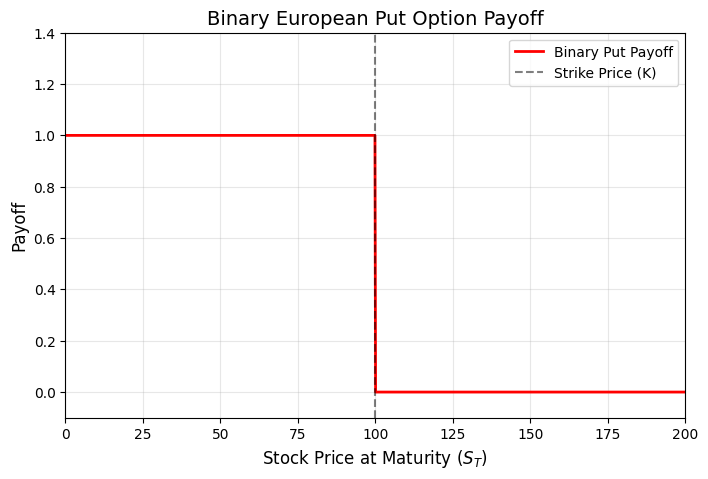

In [4]:
binary_payoff('Put')

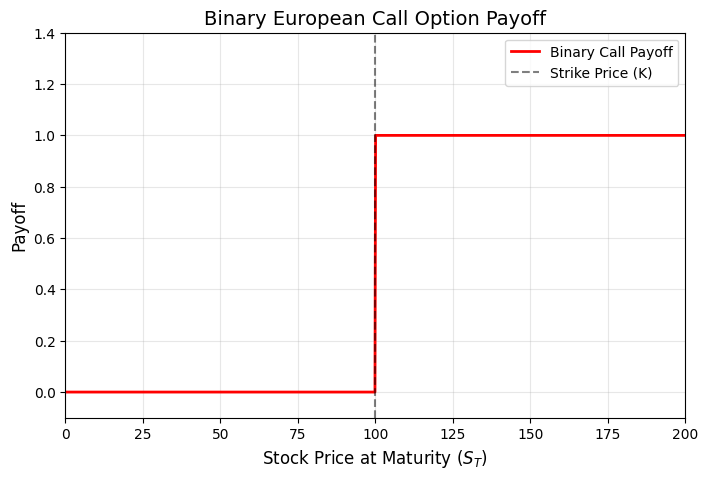

In [5]:
binary_payoff('Call')

Binary call payoff as a function of $S_T$

The graph of the delta of the option as a function of current stock price $S_t$ for some arbitrary $t > 0$ less than $T$.

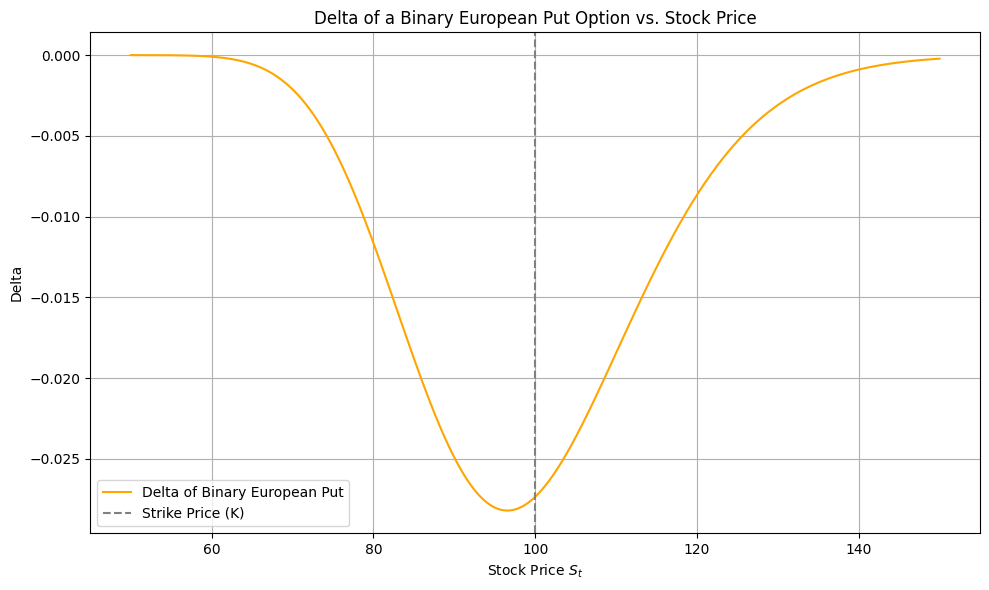

In [6]:
# Stock price range
S = np.linspace(50, 150, 1000)

# Compute d_
d_ = (np.log(S / K) + (r - 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))

# Compute delta of the binary put
delta = -np.exp(-r * tau) * norm.pdf(d_) / (S * sigma * np.sqrt(tau))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(S, delta, label='Delta of Binary European Put', color = 'orange')
plt.axvline(K, color='gray', linestyle='--', label='Strike Price (K)')
plt.title('Delta of a Binary European Put Option vs. Stock Price')
plt.xlabel('Stock Price $S_t$')
plt.ylabel('Delta')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

* We can see a sharp negative spike around the strike price $K = \$100$
* Away from the strike, delta quickly approaches zero.
* This reflects how the option’s sensitivity to changes in $S_t$ is high only near the strike, where the probability of finishing in-the-money is most sensitive to the stock price.
* Since the payoff of the binary put option is a step function at $S_T=K$, the option's value is very sensitive to small changes in $S_t$ near the strike — because that’s where the final payout flips from 1 to 0.
* In the tails, small changes in $S_t$ don't affect the outcome (the option is almost surely in or out of the money), so delta is near zero in the tails.

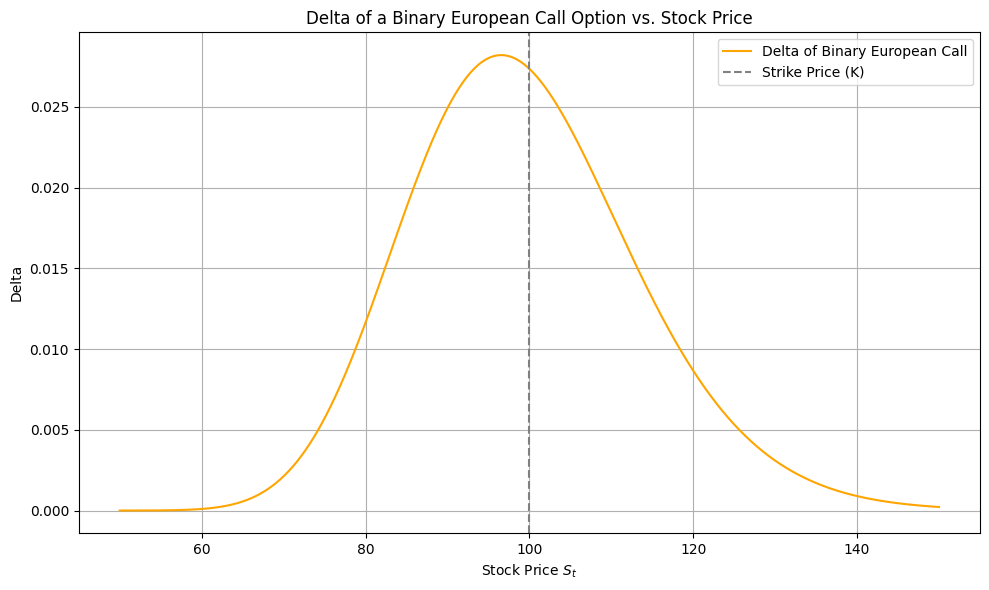

In [7]:
# Stock price range
S = np.linspace(50, 150, 1000)

# Compute d_
d_ = (np.log(S / K) + (r - 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))

# Compute delta of the binary call
delta = np.exp(-r * tau) * norm.pdf(d_) / (S * sigma * np.sqrt(tau))
# Plot
plt.figure(figsize=(10, 6))
plt.plot(S, delta, label='Delta of Binary European Call', color = 'orange')
plt.axvline(K, color='gray', linestyle='--', label='Strike Price (K)')
plt.title('Delta of a Binary European Call Option vs. Stock Price')
plt.xlabel('Stock Price $S_t$')
plt.ylabel('Delta')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The graph of the delta of the option as a function of current stock price $S_{T-\delta t}$ for a small $\delta t > 0$. Explain what happens with the delta of the option when $\delta t \to 0$.

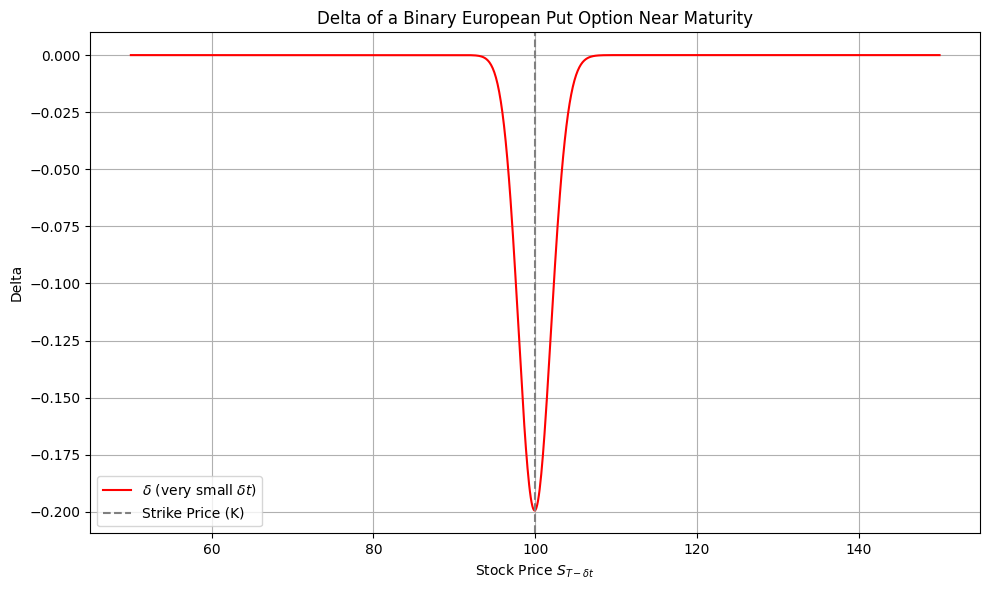

In [12]:
# Parameters
K = 100        # Strike price
r = 0.05       # Risk-free rate
sigma = 0.2    # Volatility
delta_t = 0.01 # Very small time to maturity

# Stock price range
S = np.linspace(50, 150, 1000)

# Compute d2 for small delta_t
d2_small_dt = (np.log(S / K) + (r - 0.5 * sigma ** 2) * delta_t) / (sigma * np.sqrt(delta_t))

# Compute delta of the binary put for small delta_t
delta_small_dt = -np.exp(-r * delta_t) * norm.pdf(d2_small_dt) / (S * sigma * np.sqrt(delta_t))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(S, delta_small_dt, label=r'$\delta$ (very small $\delta t$)', color='red')
plt.axvline(K, color='gray', linestyle='--', label='Strike Price (K)')
plt.title('Delta of a Binary European Put Option Near Maturity')
plt.xlabel('Stock Price $S_{T - \delta t}$')
plt.ylabel('Delta')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

As $\delta t \to 0$ becomes very small, the delta of the binary European put option becomes sharply peaked around the strike price $K$.  This reflects the fact that, near maturity, the option's value becomes extremely sensitive to changes in the stock price near $K$, since a small movement could change the payout from 1 to 0 or vice versa. In the limit as $\delta t \to 0$, the delta becomes a Dirac delta function (a spike with infinite height and zero width), which is the formal derivative of the discontinuous step payoff at maturity.

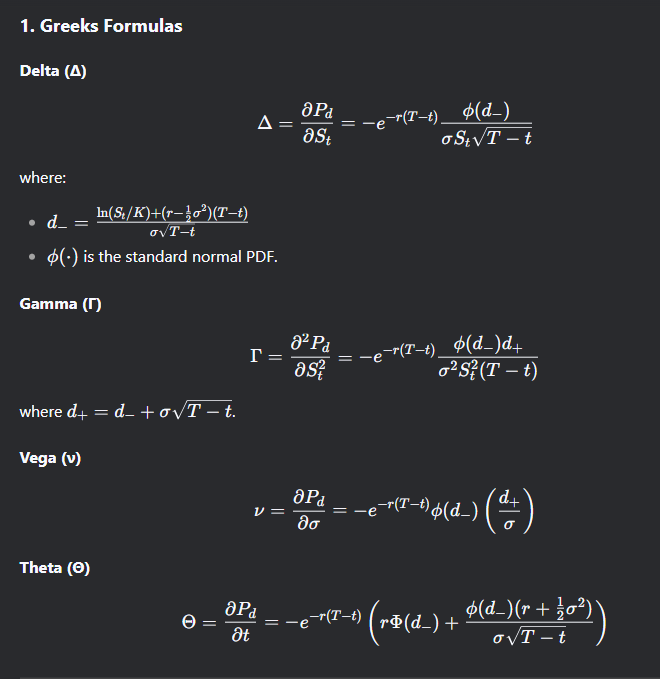

In [19]:
# Parameters
K = 100       # Strike price
T = 1.0       # Time to maturity (years)
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
t = 0.5       # Current time (years)
S_t = np.linspace(50, 150, 500)  # Stock price range

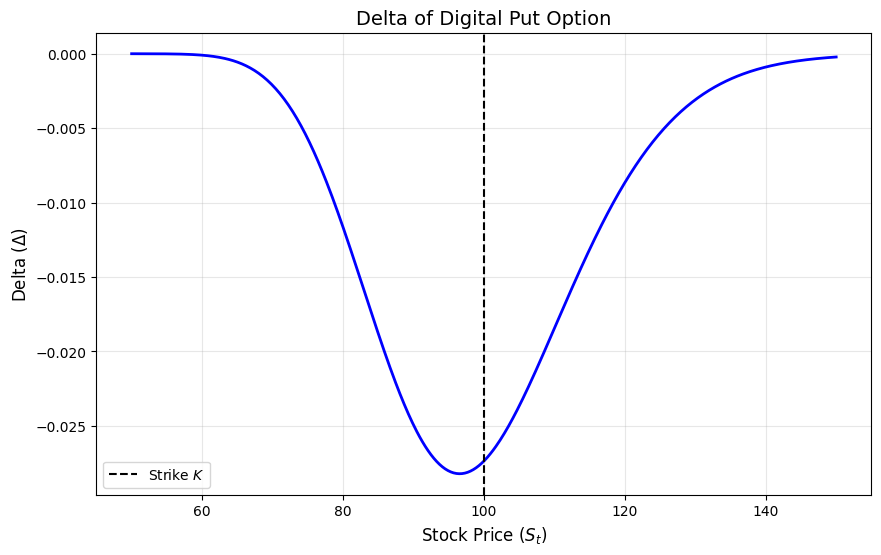

In [20]:
def digital_put_delta(S, K, T, t, r, sigma):
    tau = T - t
    d_minus = (np.log(S/K) + (r - 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    return -np.exp(-r * tau) * norm.pdf(d_minus) / (sigma * S * np.sqrt(tau))

delta = digital_put_delta(S_t, K, T, t, r, sigma)

plt.figure(figsize=(10, 6))
plt.plot(S_t, delta, 'b-', lw=2)
plt.axvline(K, color='k', linestyle='--', label='Strike $K$')
plt.xlabel('Stock Price ($S_t$)', fontsize=12)
plt.ylabel('Delta ($\Delta$)', fontsize=12)
plt.title('Delta of Digital Put Option', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

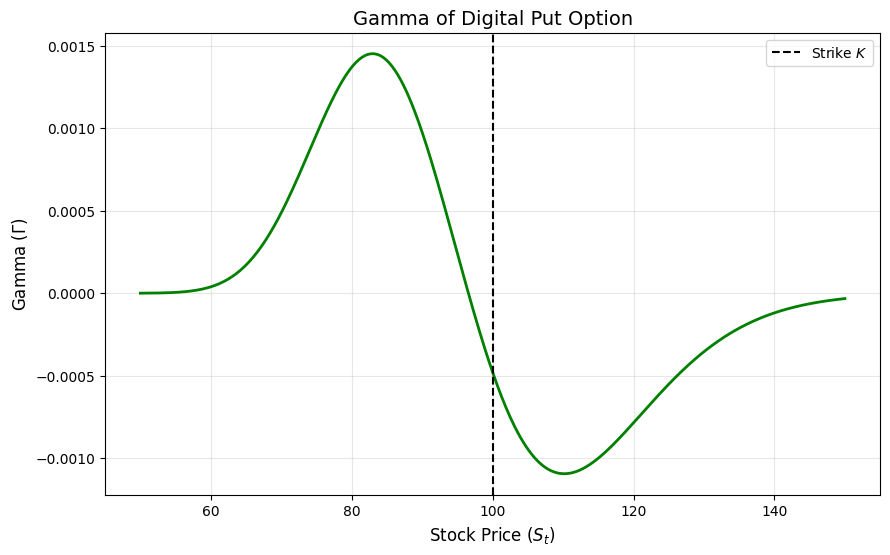

In [21]:
def digital_put_gamma(S, K, T, t, r, sigma):
    tau = T - t
    d_minus = (np.log(S/K) + (r - 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d_plus = d_minus + sigma * np.sqrt(tau)
    return -np.exp(-r * tau) * norm.pdf(d_minus) * d_plus / (sigma**2 * S**2 * tau)

gamma = digital_put_gamma(S_t, K, T, t, r, sigma)

plt.figure(figsize=(10, 6))
plt.plot(S_t, gamma, 'g-', lw=2)
plt.axvline(K, color='k', linestyle='--', label='Strike $K$')
plt.xlabel('Stock Price ($S_t$)', fontsize=12)
plt.ylabel('Gamma ($\Gamma$)', fontsize=12)
plt.title('Gamma of Digital Put Option', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

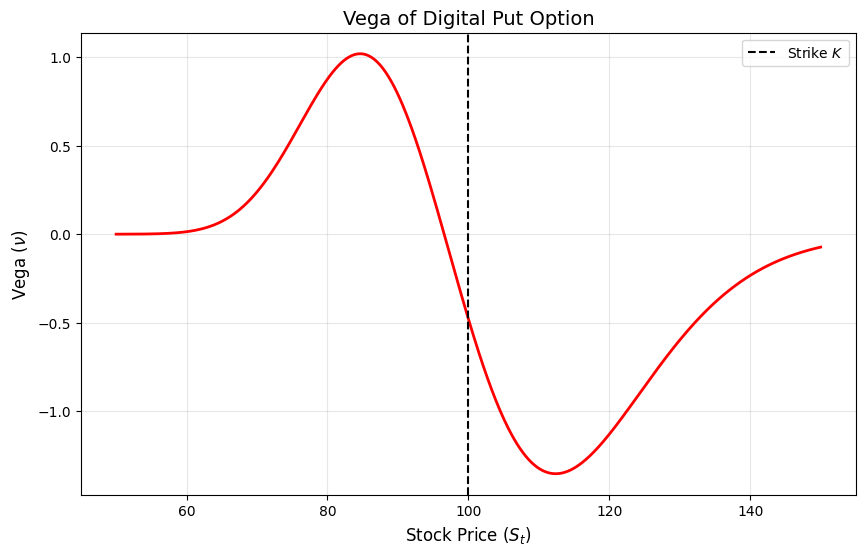

In [22]:
def digital_put_vega(S, K, T, t, r, sigma):
    tau = T - t
    d_minus = (np.log(S/K) + (r - 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d_plus = d_minus + sigma * np.sqrt(tau)
    return -np.exp(-r * tau) * norm.pdf(d_minus) * (d_plus / sigma)

vega = digital_put_vega(S_t, K, T, t, r, sigma)

plt.figure(figsize=(10, 6))
plt.plot(S_t, vega, 'r-', lw=2)
plt.axvline(K, color='k', linestyle='--', label='Strike $K$')
plt.xlabel('Stock Price ($S_t$)', fontsize=12)
plt.ylabel('Vega ($\\nu$)', fontsize=12)
plt.title('Vega of Digital Put Option', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## For a binary put option we have that the Greeks look like

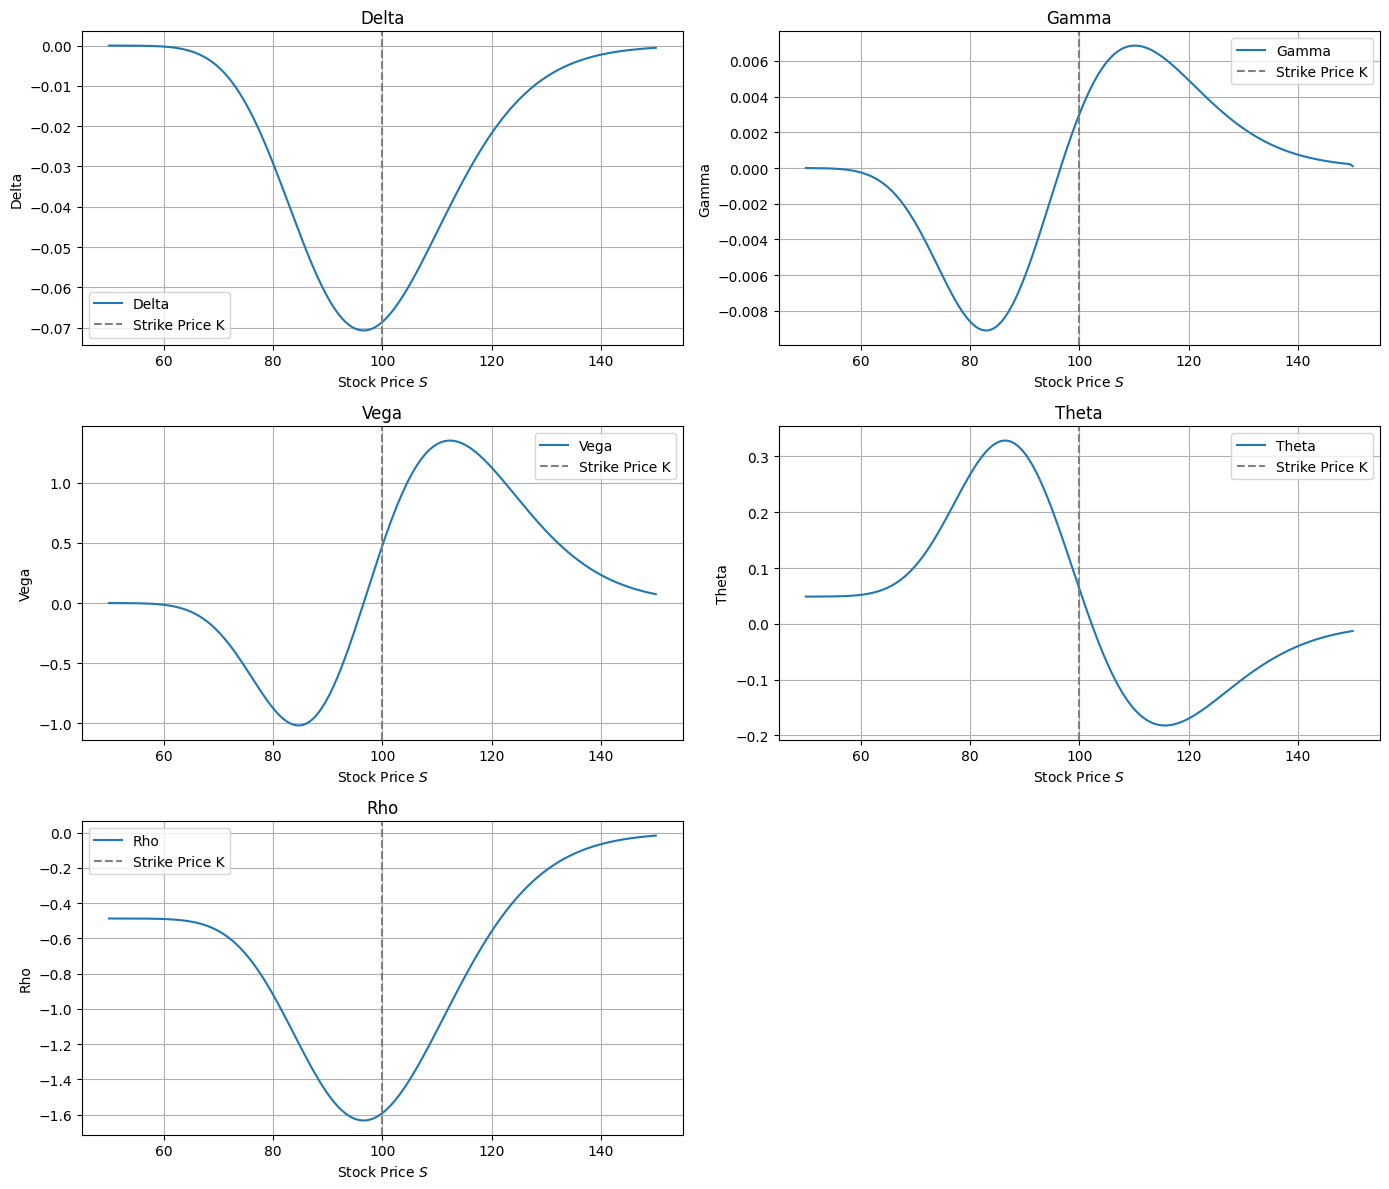

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
K = 100         # Strike price
T = 0.5         # Time to maturity in years
r = 0.05        # Risk-free interest rate
sigma = 0.2     # Volatility
dS = 0.1        # Step size for numerical derivatives

# Stock price range
S_vals = np.linspace(50, 150, 400)

# Black-Scholes binary put price function
def binary_put_price(S, K, T, r, sigma):
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return np.exp(-r * T) * norm.cdf(-d2)

# Compute binary put price
prices = binary_put_price(S_vals, K, T, r, sigma)

# Numerical derivatives for Greeks
delta = np.gradient(prices, dS)
gamma = np.gradient(delta, dS)

# Vega: sensitivity to volatility
def price_sigma(sigma_val):
    return binary_put_price(S_vals, K, T, r, sigma_val)

vega = (price_sigma(sigma + 1e-2) - price_sigma(sigma - 1e-2)) / (2e-2)

# Theta: sensitivity to time
def price_time(T_val):
    return binary_put_price(S_vals, K, T_val, r, sigma)

theta = -(price_time(T + 1/365) - price_time(T - 1/365)) / (2 * (1/365))

# Rho: sensitivity to interest rate
def price_r(r_val):
    return binary_put_price(S_vals, K, T, r_val, sigma)

rho = (price_r(r + 1e-4) - price_r(r - 1e-4)) / (2e-4)

# Plotting all Greeks
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.ravel()
titles = ["Delta", "Gamma", "Vega", "Theta", "Rho"]
greeks = [delta, gamma, vega, theta, rho]

for i, (title, greek) in enumerate(zip(titles, greeks)):
    axs[i].plot(S_vals, greek, label=title)
    axs[i].axvline(x=K, color='gray', linestyle='--', label='Strike Price K')
    axs[i].set_title(title)
    axs[i].set_xlabel("Stock Price $S$")
    axs[i].set_ylabel(title)
    axs[i].legend()
    axs[i].grid(True)

axs[5].axis('off')  # Empty subplot
plt.tight_layout()
plt.show()


## For a binary call option we have that the Greeks look like

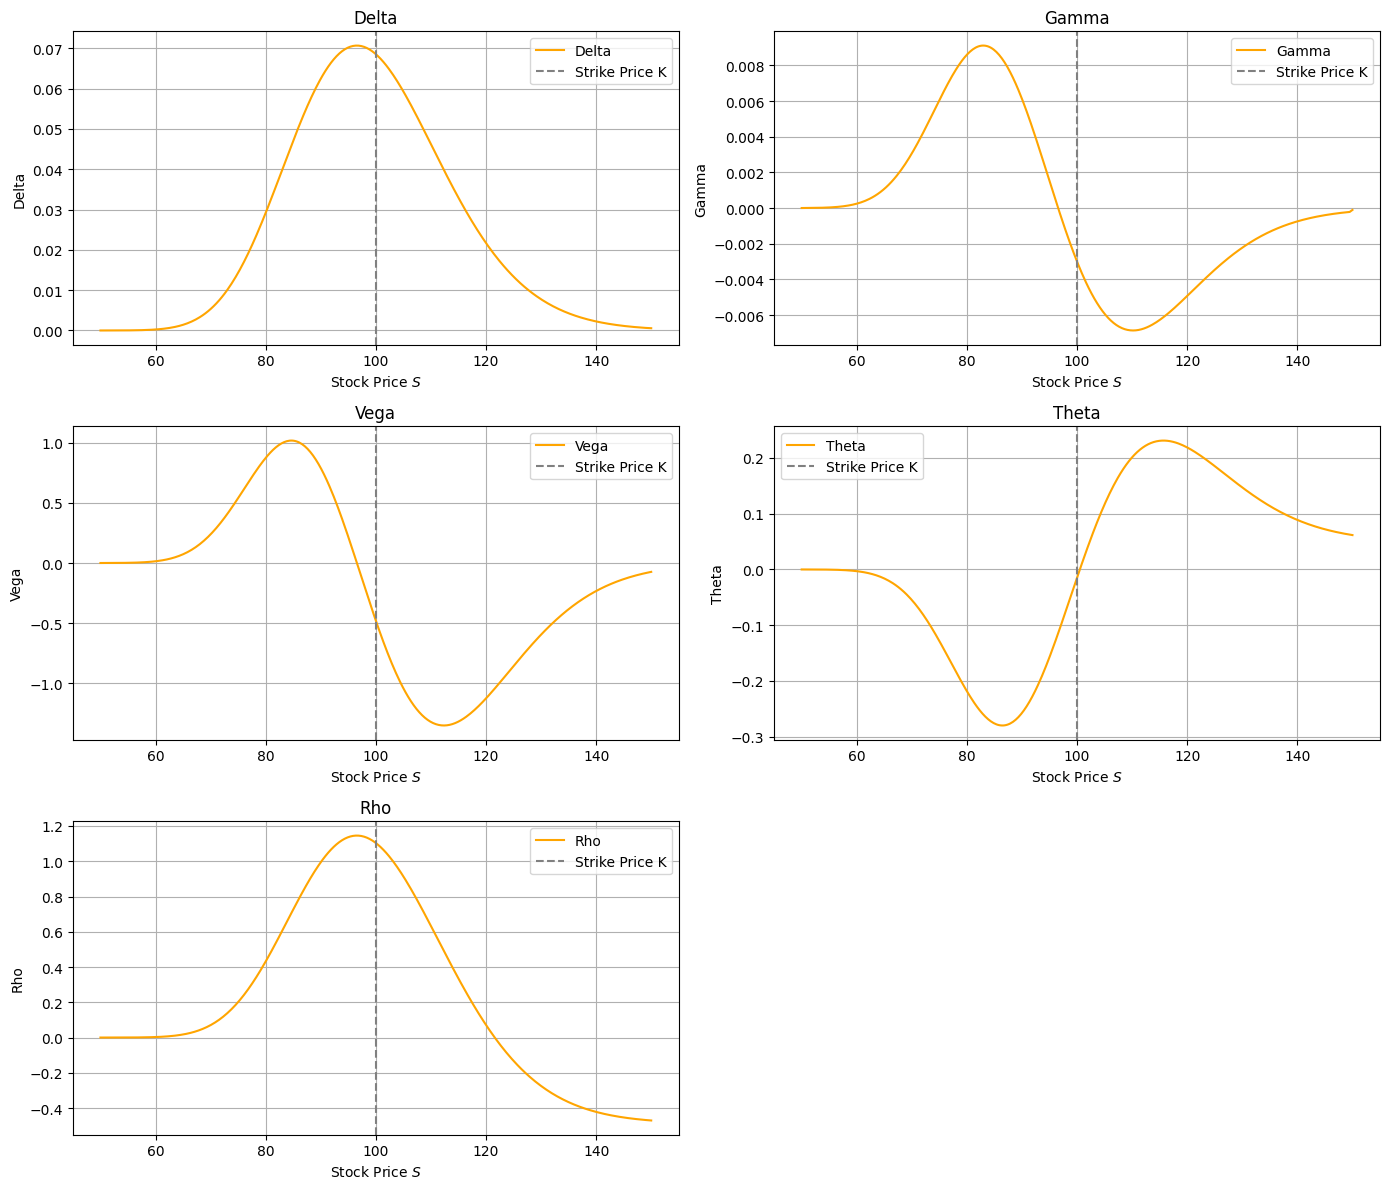

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
K = 100         # Strike price
T = 0.5         # Time to maturity in years
r = 0.05        # Risk-free interest rate
sigma = 0.2     # Volatility
dS = 0.1        # Step size for numerical derivatives

# Stock price range
S_vals = np.linspace(50, 150, 400)

# Black-Scholes binary call price function
def binary_call_price(S, K, T, r, sigma):
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return np.exp(-r * T) * norm.cdf(d2)

# Compute binary call price
prices = binary_call_price(S_vals, K, T, r, sigma)

# Numerical derivatives for Greeks
delta = np.gradient(prices, dS)
gamma = np.gradient(delta, dS)

# Vega: sensitivity to volatility
def price_sigma(sigma_val):
    return binary_call_price(S_vals, K, T, r, sigma_val)

vega = (price_sigma(sigma + 1e-2) - price_sigma(sigma - 1e-2)) / (2e-2)

# Theta: sensitivity to time
def price_time(T_val):
    return binary_call_price(S_vals, K, T_val, r, sigma)

theta = -(price_time(T + 1/365) - price_time(T - 1/365)) / (2 * (1/365))

# Rho: sensitivity to interest rate
def price_r(r_val):
    return binary_call_price(S_vals, K, T, r_val, sigma)

rho = (price_r(r + 1e-4) - price_r(r - 1e-4)) / (2e-4)

# Plotting all Greeks
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.ravel()
titles = ["Delta", "Gamma", "Vega", "Theta", "Rho"]
greeks = [delta, gamma, vega, theta, rho]

for i, (title, greek) in enumerate(zip(titles, greeks)):
    axs[i].plot(S_vals, greek, label=title, color = 'orange')
    axs[i].axvline(x=K, color='gray', linestyle='--', label='Strike Price K')
    axs[i].set_title(title)
    axs[i].set_xlabel("Stock Price $S$")
    axs[i].set_ylabel(title)
    axs[i].legend()
    axs[i].grid(True)

axs[5].axis('off')  # Empty subplot
plt.tight_layout()
plt.show()


## The Greeks for European options

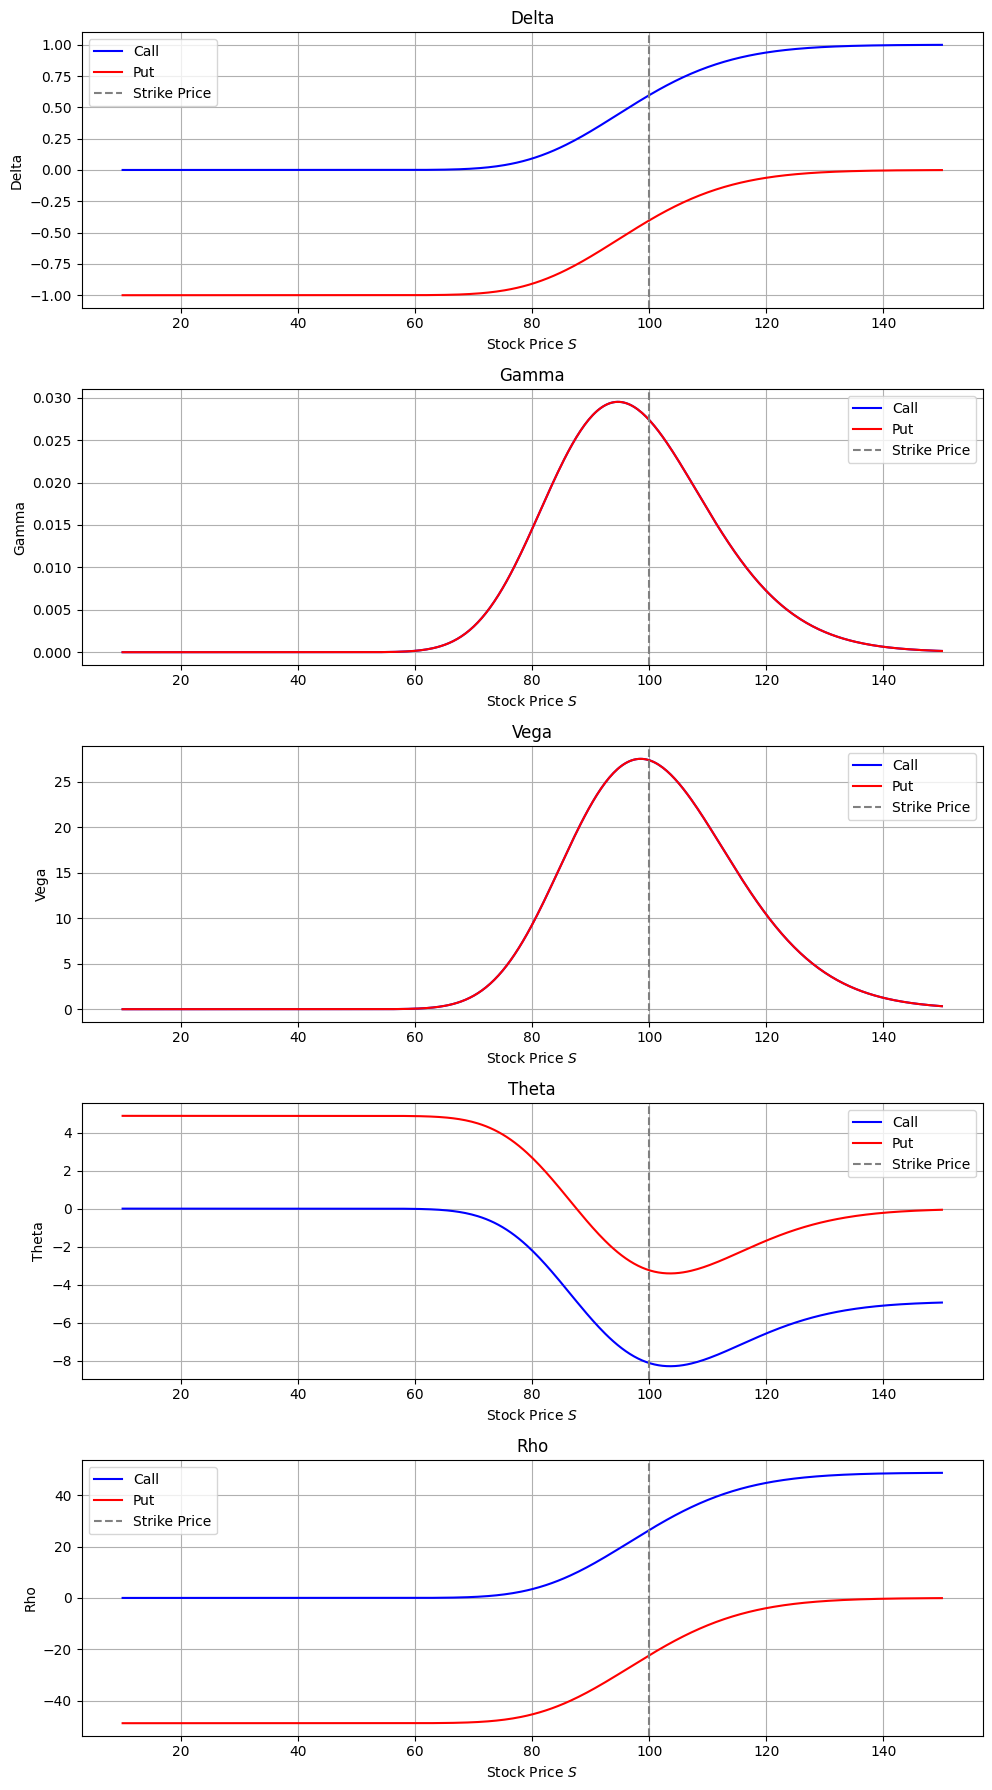

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
K = 100       # Strike price
T = 0.5       # Time to maturity
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
dS = 0.1      # Stock price step for gradients

# Stock price range
S_vals = np.linspace(10, 150, 400)

# Black-Scholes d1 and d2
def d1(S, K, T, r, sigma):
    return (np.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))

def d2(S, K, T, r, sigma):
    return d1(S, K, T, r, sigma) - sigma * np.sqrt(T)

# Call and put prices
def call_price(S, K, T, r, sigma):
    d_1 = d1(S, K, T, r, sigma)
    d_2 = d2(S, K, T, r, sigma)
    return S * norm.cdf(d_1) - K * np.exp(-r * T) * norm.cdf(d_2)

def put_price(S, K, T, r, sigma):
    d_1 = d1(S, K, T, r, sigma)
    d_2 = d2(S, K, T, r, sigma)
    return K * np.exp(-r * T) * norm.cdf(-d_2) - S * norm.cdf(-d_1)

# Greeks
def call_delta(S, K, T, r, sigma):
    return norm.cdf(d1(S, K, T, r, sigma))

def put_delta(S, K, T, r, sigma):
    return norm.cdf(d1(S, K, T, r, sigma)) - 1

def gamma(S, K, T, r, sigma):
    d_1 = d1(S, K, T, r, sigma)
    return norm.pdf(d_1) / (S * sigma * np.sqrt(T))

def vega(S, K, T, r, sigma):
    return S * norm.pdf(d1(S, K, T, r, sigma)) * np.sqrt(T)

def call_theta(S, K, T, r, sigma):
    d_1 = d1(S, K, T, r, sigma)
    d_2 = d2(S, K, T, r, sigma)
    term1 = - (S * norm.pdf(d_1) * sigma) / (2 * np.sqrt(T))
    term2 = - r * K * np.exp(-r * T) * norm.cdf(d_2)
    return term1 + term2

def put_theta(S, K, T, r, sigma):
    d_1 = d1(S, K, T, r, sigma)
    d_2 = d2(S, K, T, r, sigma)
    term1 = - (S * norm.pdf(d_1) * sigma) / (2 * np.sqrt(T))
    term2 = r * K * np.exp(-r * T) * norm.cdf(-d_2)
    return term1 + term2

def call_rho(S, K, T, r, sigma):
    return K * T * np.exp(-r * T) * norm.cdf(d2(S, K, T, r, sigma))

def put_rho(S, K, T, r, sigma):
    return -K * T * np.exp(-r * T) * norm.cdf(-d2(S, K, T, r, sigma))

# Evaluate Greeks
call_greeks = {
    'Delta': call_delta(S_vals, K, T, r, sigma),
    'Gamma': gamma(S_vals, K, T, r, sigma),
    'Vega': vega(S_vals, K, T, r, sigma),
    'Theta': call_theta(S_vals, K, T, r, sigma),
    'Rho': call_rho(S_vals, K, T, r, sigma)
}

put_greeks = {
    'Delta': put_delta(S_vals, K, T, r, sigma),
    'Gamma': gamma(S_vals, K, T, r, sigma),
    'Vega': vega(S_vals, K, T, r, sigma),
    'Theta': put_theta(S_vals, K, T, r, sigma),
    'Rho': put_rho(S_vals, K, T, r, sigma)
}

# Plot
fig, axs = plt.subplots(5, 1, figsize=(10, 18))
greek_names = ['Delta', 'Gamma', 'Vega', 'Theta', 'Rho']

for i, greek in enumerate(greek_names):
    axs[i].plot(S_vals, call_greeks[greek], label='Call', color='blue')
    axs[i].plot(S_vals, put_greeks[greek], label='Put', color='red')
    axs[i].axvline(K, color='gray', linestyle='--', label='Strike Price')
    axs[i].set_title(greek)
    axs[i].set_xlabel('Stock Price $S$')
    axs[i].set_ylabel(greek)
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()


## Models

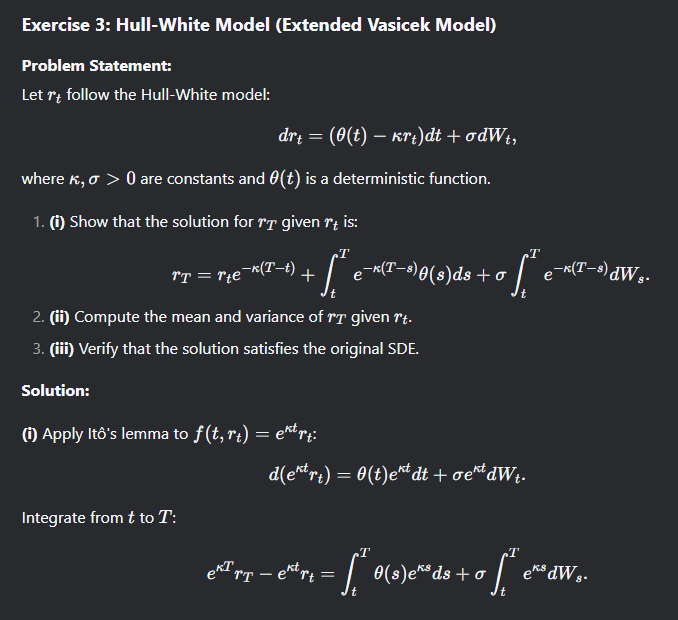

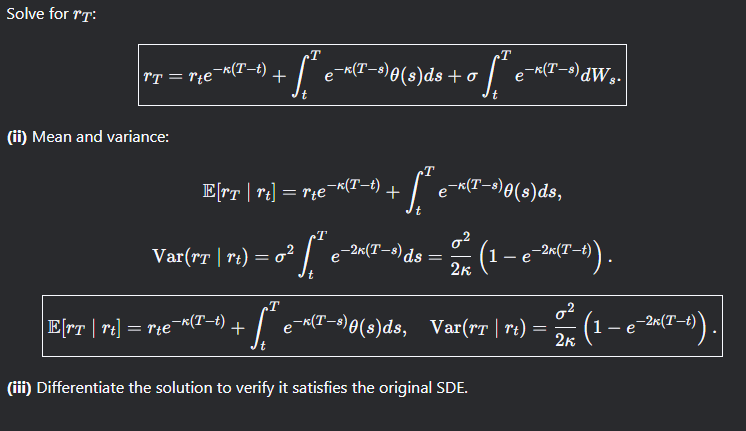

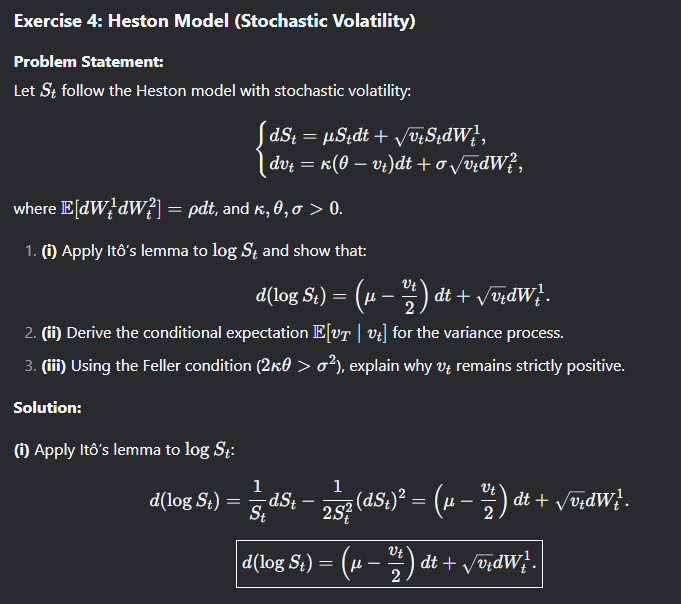

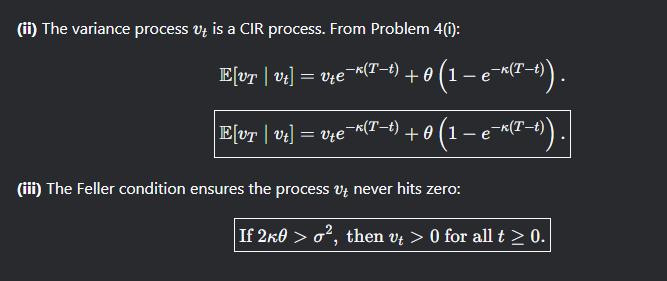

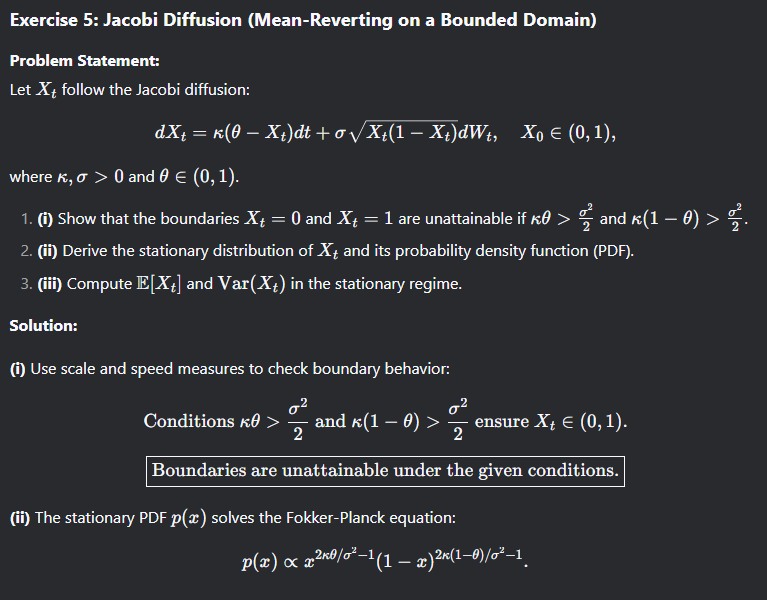

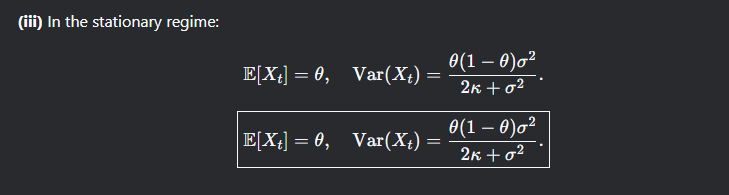